In [150]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# !ln -s /content/gdrive/My\ Drive/ /mydrive

In [151]:
# DEFINE UTILITY FUNCTION FOR DISPLAYING IMAGES

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

/content/gdrive/MyDrive/yolov4/Detection/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x

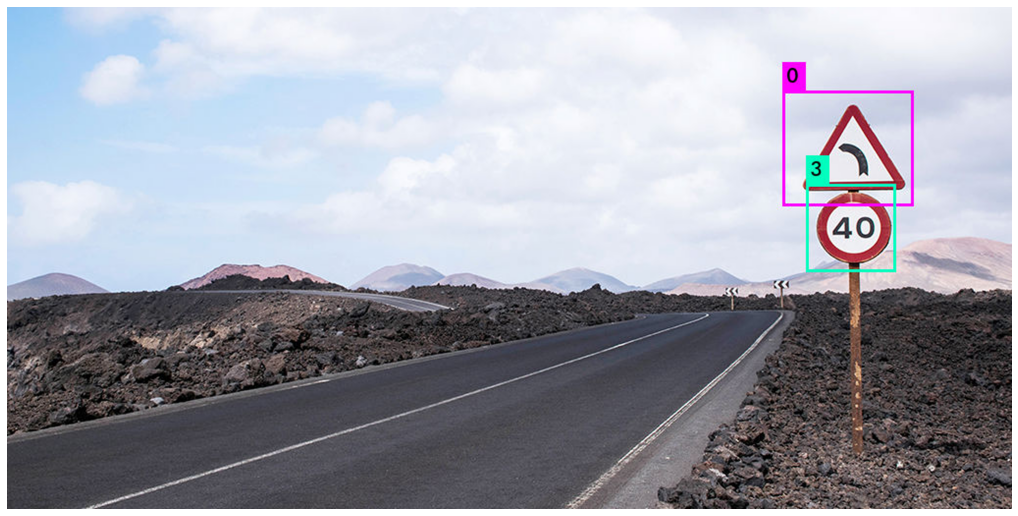

In [152]:
# DETECT TRAFFIC SIGN ON IMAGE

import os
import random

%cd /content/gdrive/MyDrive/yolov4/Detection/darknet

#/test has images that we can test our detector on
test_images = [f for f in os.listdir('Traffic-sign-1/test') if f.endswith('.jpg')] 
#img_path = "Traffic-sign-1/test/" + random.choice(test_images);
img_path = "/content/gdrive/MyDrive/yolov4/Detection/keep_right_sign.jpg"
#imShow(img_path)
#test out our detector!
!chmod +x ./darknet
!./darknet detect cfg/custom-yolov4-detector-test.cfg backup/custom-yolov4-detector_final.weights -ext_output {img_path} -dont-show > result.txt
imShow('/content/gdrive/MyDrive/yolov4/Detection/darknet/predictions.jpg')

In [161]:
# CROPPING THE IMAGE

import re
import cv2
path='/content/gdrive/MyDrive/yolov4/Detection/darknet/result.txt'
myfile=open(path,'r')
lines=myfile.readlines()
pattern= "class_name"
img = cv2.imread(img_path)

# remove past predictions
for file in os.listdir("/content/gdrive/MyDrive/yolov4/Detection/darknet/cropped_images"):
  os.remove("/content/gdrive/MyDrive/yolov4/Detection/darknet/cropped_images/" + file)

paths_file = open("/content/gdrive/MyDrive/yolov4/Classification/darknet/paths.txt",'w+')
# new predictions
for (idx, line) in enumerate(lines):
  if idx >= 8:
    Cord_Raw=line

    Cord=Cord_Raw.split("(")[1].split(")")[0].split(":")
    x_min=int(Cord[1].strip().split("   ")[0].strip())
    x_max=x_min + int(Cord[3].strip().split("   ")[0])
    y_min=int(Cord[2].strip().split("   ")[0].strip())
    y_max=y_min+ int(Cord[4].strip())
    crop_img = img[y_min:y_max, x_min:x_max]
    cv2.imwrite("/content/gdrive/MyDrive/yolov4/Detection/darknet/cropped_images/cropped_prediction" + str(idx) + ".jpg", crop_img)
    paths_file.write("/content/gdrive/MyDrive/yolov4/Detection/darknet/cropped_images/cropped_prediction" + str(idx) + ".jpg\n")

paths_file.close()

In [162]:
def print_label():
  path='/content/gdrive/MyDrive/yolov4/Classification/darknet/result.txt'
  myfile=open(path,'r')
  print("\n ----- RESULTS ----- \n")
  lines=myfile.readlines()
  for (idx, line) in enumerate(lines):
    if idx >= 7:
      if line.startswith("Enter"):
        print("\n")
        img_pth = line.split(":")[1].strip()
        if(img_pth == ""):
          break
        imShow(img_pth)
        continue
      label = line.split(":")[0]
      print(label)

/content/gdrive/MyDrive/yolov4/Classification/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 

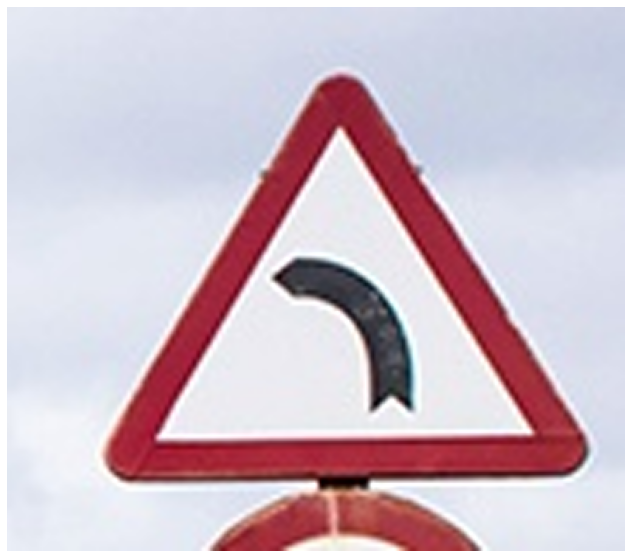

Road narrows on the right




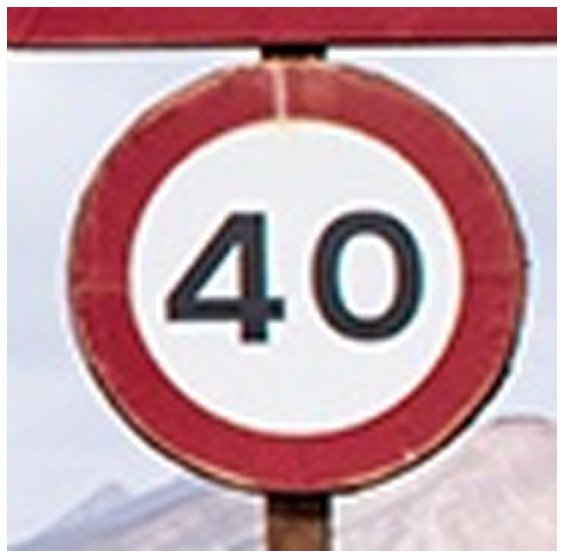

Speed limit (20km/h)




In [163]:
import os
%cd /content/gdrive/MyDrive/yolov4/Classification/darknet
#img_path = '/content/gdrive/MyDrive/yolov4/Detection/darknet/Cropped_prediction.jpg'
img_path = "/content/gdrive/MyDrive/yolov4/Detection/signs.jpg"
#test out our detector!
# Korišćenje best weights umesto final
!chmod +x ./darknet

#!./darknet detector test data/names.data data/names.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_best.weights -dont-show -ext_output < paths.txt > result.txt 
!./darknet detector test data/names.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_best.weights -dont_show -ext_output < paths.txt > result.txt

print_label()
#imShow('/content/gdrive/MyDrive/yolov4/Classification/darknet/predictions.jpg')